In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [95]:
data = pd.read_csv('educacao_idh.csv')

attr_names = {
    '1' : 'TX_APROV_FUND', '2' : 'TX_APROV_MED', '3' : 'TX_REPR_FUND',
    '4' : 'TX_REPR_MED', '5' : 'TX_EVAS_FUND', '6' : 'TX_EVAS_MED',
    '7' : 'TX_EJA_FUND', '8' : 'TX_EJA_MED', '9' : 'TX_NRES_FUND',
    '10' : 'TX_NRES_MED', '11' : 'MED_ALU_INF', '12' : 'MED_ALU_FUND',
    '13' : 'MED_ALU_MED', '14' : 'MED_HAU_INF', '15' : 'MED_HAU_FUND',
    '16' : 'MED_HAU_MED', '17' : 'TX_DIS_FUND', '18' : 'TX_DIS_MED'
}

estado_para_regiao = {
    'SP': 'Sudeste', 'RJ': 'Sudeste', 'MG': 'Sudeste', 'ES': 'Sudeste',
    'PR': 'Sul', 'SC': 'Sul', 'RS': 'Sul',
    'BA': 'Nordeste', 'PE': 'Nordeste', 'CE': 'Nordeste', 'RN': 'Nordeste', 
    'PB': 'Nordeste', 'SE': 'Nordeste', 'AL': 'Nordeste', 'MA': 'Nordeste', 'PI': 'Nordeste',
    'AM': 'Norte', 'PA': 'Norte', 'AC': 'Norte', 'RO': 'Norte', 'RR': 'Norte', 'AP': 'Norte', 'TO': 'Norte',
    'DF': 'Centro-Oeste', 'GO': 'Centro-Oeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste'
}

data['Região'] = data['estado'].map(lambda x: estado_para_regiao.get(x, ''))

cols = data.columns.tolist()
cols.insert(3, cols.pop(cols.index('Região')))
data = data[cols]

data = data.rename(columns = attr_names)

data.head()

idMunicipio      nomeMunicipio estado Região  TX_APROV_FUND  TX_APROV_MED  \
0       110002          Ariquemes     RO  Norte           83.7          68.3   
1       110003             Cabixi     RO  Norte           83.2          82.4   
2       110004             Cacoal     RO  Norte           85.2          76.6   
3       110005         Cerejeiras     RO  Norte           84.7          85.8   
4       110006  Colorado do Oeste     RO  Norte           87.1          75.8   

   TX_REPR_FUND  TX_REPR_MED  TX_EVAS_FUND  TX_EVAS_MED  ...  TX_NRES_MED  \
0          11.8         13.0           2.6         12.6  ...          4.0   
1          11.7          5.4           2.1          8.4  ...          3.3   
2          10.5         10.8           3.1          8.2  ...          3.7   
3          12.4          5.5           2.0          5.8  ...          3.5   
4           9.8         14.6           2.0          5.7  ...          3.5   

   MED_ALU_INF  MED_ALU_FUND  MED_ALU_MED  MED_HAU_INF  MED_HAU_FUND  \
0         22.5          25.5         27.3          5.5           4.5   
1         19.2          18.6         20.1          6.5           4.1   
2         18.9          22.7         29.1          5.0           4.3   
3         25.4          21.0         22.4          6.0           4.3   
4         19.3          19.3         25.5          4.9           4.3   

   MED_HAU_MED  TX_DIS_FUND  TX_DIS_MED  IDHMEducacao  
0          4.3         25.4        29.9         Médio  
1          4.0         20.5        17.6         Baixo  
2          5.1         20.1        28.6         Médio  
3          4.3         19.3        18.2         Médio  
4          5.5         18.7        15.5         Baixo  

[5 rows x 23 columns]

In [96]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
medias_estaduais = data.groupby('estado')[numeric_cols].transform('mean')
for col in numeric_cols:
    data[col].fillna(medias_estaduais[col], inplace=True)

In [63]:
data.describe()

idMunicipio  TX_APROV_FUND  TX_APROV_MED  TX_REPR_FUND  TX_REPR_MED  \
count    5482.000000    5482.000000   5482.000000   5482.000000  5482.000000   
mean   325562.045239      83.307899     76.347786     11.518497    10.156581   
std     98173.849583       8.506316      9.249815      6.329317     5.720820   
min    110002.000000      46.400000     21.100000      0.200000     0.000000   
25%    251274.250000      77.500000     70.700000      6.500000     6.000000   
50%    314657.500000      84.400000     77.100000     10.800000     9.400000   
75%    411918.750000      90.000000     83.000000     15.600000    13.400000   
max    530010.000000      99.500000    100.000000     47.600000    61.100000   

       TX_EVAS_FUND  TX_EVAS_MED  TX_EJA_FUND   TX_EJA_MED  TX_NRES_FUND  \
count   5482.000000  5482.000000  5482.000000  5482.000000   5482.000000   
mean       3.743652    11.730876     1.429953     1.764757      2.464912   
std        2.159712     5.049932     1.397816     2.155523      1.877644   
min        0.000000     0.000000     0.000000     0.000000      0.000000   
25%        2.200000     8.300000     0.400000     0.400000      1.300000   
50%        3.400000    11.100000     1.100000     1.100000      2.100000   
75%        4.800000    14.500000     2.100000     2.400000      3.200000   
max       22.500000    63.800000    17.100000    27.900000     60.300000   

       TX_NRES_MED  MED_ALU_INF  MED_ALU_FUND  MED_ALU_MED  MED_HAU_INF  \
count  5482.000000  5482.000000   5482.000000  5482.000000  5482.000000   
mean      2.747318    17.511811     21.503010    29.405169     5.275200   
std       2.688746     3.872385      3.824313     5.847151     1.463123   
min       0.100000     4.800000      6.500000     9.100000     2.800000   
25%       1.100000    15.100000     19.025000    25.500000     4.000000   
50%       2.000000    17.300000     21.700000    29.600000     4.900000   
75%       3.400000    19.700000     24.200000    33.300000     6.100000   
max      34.500000    42.700000     37.700000    64.000000    12.000000   

       MED_HAU_FUND  MED_HAU_MED  TX_DIS_FUND   TX_DIS_MED  
count   5482.000000  5482.000000  5482.000000  5482.000000  
mean       4.379679     4.353242    25.587304    35.891988  
std        0.459479     0.454977    11.989326    16.465586  
min        3.500000     3.000000     1.300000     2.600000  
25%        4.100000     4.000000    16.300000    22.525000  
50%        4.300000     4.300000    24.300000    34.000000  
75%        4.400000     4.600000    34.400000    48.200000  
max        9.200000     8.600000    66.100000    83.300000

In [64]:
data_numeric = data.iloc[:, 4:21]

idh_mapping = {
    'Muito Baixo': 1,
    'Baixo': 2,
    'Médio': 3,
    'Alto': 4,
    'Muito alto': 5
}

data_numeric['IDHMEducacao'] = data['IDHMEducacao'].map(idh_mapping)

data_numeric.head()

TX_APROV_FUND  TX_APROV_MED  TX_REPR_FUND  TX_REPR_MED  TX_EVAS_FUND  \
0           83.7          68.3          11.8         13.0           2.6   
1           83.2          82.4          11.7          5.4           2.1   
2           85.2          76.6          10.5         10.8           3.1   
3           84.7          85.8          12.4          5.5           2.0   
4           87.1          75.8           9.8         14.6           2.0   

   TX_EVAS_MED  TX_EJA_FUND  TX_EJA_MED  TX_NRES_FUND  TX_NRES_MED  \
0         12.6          1.9         6.1           3.3          4.0   
1          8.4          3.0         3.8           1.5          3.3   
2          8.2          1.2         4.4           3.1          3.7   
3          5.8          0.9         2.9           2.5          3.5   
4          5.7          1.1         3.9           3.0          3.5   

   MED_ALU_INF  MED_ALU_FUND  MED_ALU_MED  MED_HAU_INF  MED_HAU_FUND  \
0         22.5          25.5         27.3          5.5           4.5   
1         19.2          18.6         20.1          6.5           4.1   
2         18.9          22.7         29.1          5.0           4.3   
3         25.4          21.0         22.4          6.0           4.3   
4         19.3          19.3         25.5          4.9           4.3   

   MED_HAU_MED  TX_DIS_FUND  IDHMEducacao  
0          4.3         25.4           3.0  
1          4.0         20.5           2.0  
2          5.1         20.1           3.0  
3          4.3         19.3           3.0  
4          5.5         18.7           2.0

# Análise exploratória dos dados

## Histograma dos municípios

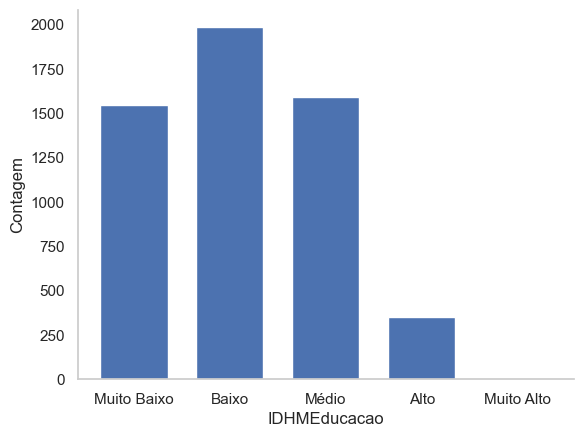

In [65]:
ordem_classes = ['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Muito Alto']

data['IDHMEducacao'] = pd.Categorical(data['IDHMEducacao'], categories=ordem_classes, ordered=True)

hist = sns.histplot(data['IDHMEducacao'], element = 'bars', shrink = 0.7, alpha = 1)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(False)
plt.ylabel('Contagem')
plt.show()

* Maior concentração de municípios com IDH em 'Médio' ou abaixo.
* Quantidade ínfima de municípios com IDH 'Muito Alto'.
* Baixa quantidade de registros com IDH 'Alto'.

In [97]:
data.loc[data['IDHMEducacao'] == 'Muito Alto', 'IDHMEducacao'] = 'Alto'

## Análise geográfica do IDH dos municípios

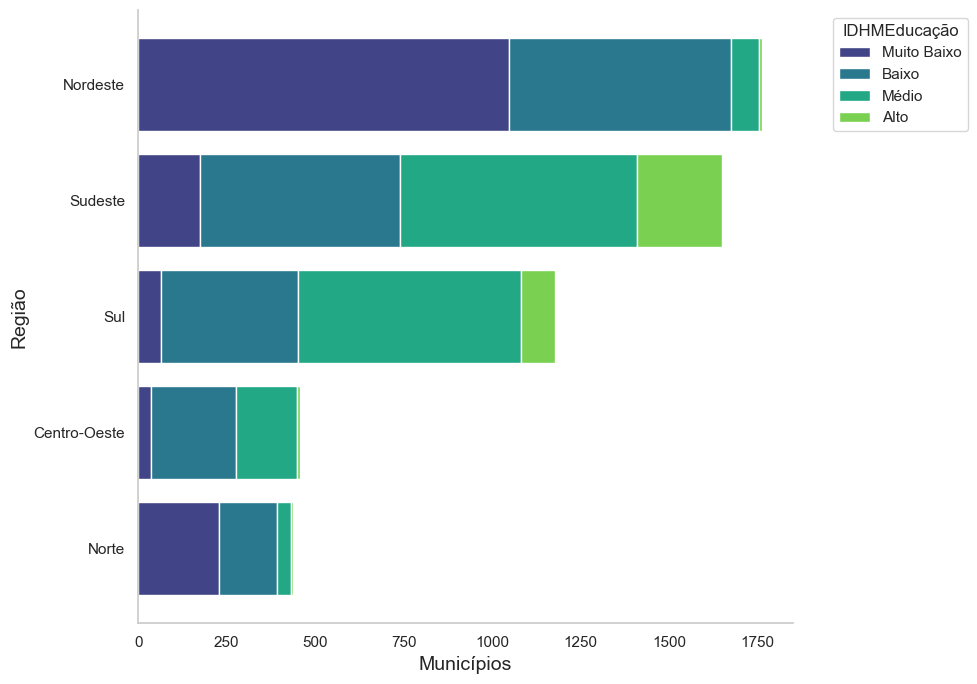

In [67]:
ordem_idhm = ['Muito Baixo', 'Baixo', 'Médio', 'Alto']
data['IDHMEducação'] = pd.Categorical(data['IDHMEducacao'], categories=ordem_idhm, ordered=True)

# Contar os registros por 'Região' e 'IDHMEducação'
counts = data.groupby(['Região', 'IDHMEducação'], observed = False).size().unstack()

# Calcular as porcentagens
percentage = counts.div(counts.sum(axis=1), axis=0)

# Ordenar os totais de objetos de maneira crescente
totals = counts.sum(axis=1).sort_values()

# Reordenar as porcentagens e contagens de acordo com a nova ordem
percentage = percentage.loc[totals.index]
counts = counts.loc[totals.index]

# Plotar o gráfico de barras horizontais empilhadas com o comprimento da barra dependendo da quantidade total
fig, ax = plt.subplots(figsize=(10, 7))

colors = sns.color_palette("viridis", len(ordem_idhm))
bottom = None
for i, level in enumerate(ordem_idhm):
    values = percentage[level] * counts.sum(axis=1)
    ax.barh(counts.index, values, left=bottom, label=level, color=colors[i])
    if bottom is None:
        bottom = values
    else:
        bottom += values

# Adicionar rótulos e título
ax.set_ylabel('Região', fontsize=14)
ax.set_xlabel('Municípios', fontsize=14)
ax.legend(title='IDHMEducação', bbox_to_anchor=(1.05, 1), loc='upper left')

# Remover grades e molduras superiores e direitas
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ajustar layout e mostrar o gráfico
plt.tight_layout()
plt.show()

* Nordeste com maior quantidade de municípios com IDH 'Baixo' ou 'Muito Baixo'.
* Sudeste e Sul com maior quantidade de municípios com IDH 'Médio' ou 'Alto'.
* Centro-Oeste e Norte com maior parte de municípios com IDH abaixo da média.

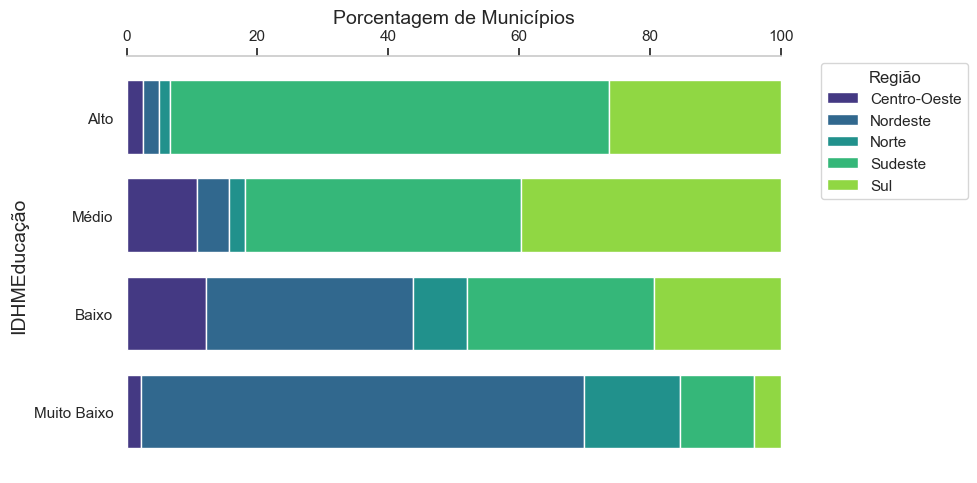

In [68]:
# Criar a tabela cruzada e calcular as porcentagens
cross_tab = pd.crosstab(data['IDHMEducação'], data['Região'])
cross_tab_percent = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

# Ordenar a tabela cruzada pela ordem desejada para 'IDHMEducação'
ordem_idhm = ['Muito Baixo', 'Baixo', 'Médio', 'Alto']
cross_tab_percent = cross_tab_percent.loc[ordem_idhm]

# Definir a paleta de cores
colors = sns.color_palette("viridis", n_colors=len(cross_tab.columns))

# Criar a figura e os eixos
fig, ax = plt.subplots(figsize=(10, 5))

# Plotar o gráfico de barras horizontais empilhadas
cross_tab_percent.plot(kind='barh', stacked=True, color=colors, ax=ax, width=0.75)

# Remover molduras desnecessárias
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Configurar o eixo x para estar no topo
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.set_xlim([0, 100])
ax.set_xticks([0, 20, 40, 60, 80, 100])

# Adicionar rótulos e título
plt.xlabel('Porcentagem de Municípios', fontsize=14)
plt.ylabel('IDHMEducação', fontsize=14)
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adicionar anotações de porcentagem nas categorias majoritárias
for i in range(len(cross_tab_percent)):
    max_val = cross_tab_percent.iloc[i].max()
    max_col = cross_tab_percent.columns[cross_tab_percent.iloc[i].argmax()]

# Ajustar layout e mostrar o gráfico
plt.tight_layout()
plt.grid(False)
plt.show()

* Maior parcela de municípios com IDH 'Médio' ou 'Alto' estão nas regiões Sul e Sudeste.
* Maior parcela de municípios com IDH 'Baixo' ou 'Muito Baixo' estão na região Nordeste.
* Centro-Oeste contribui com um maior número de municípios com IDH 'Médio' ou 'Baixo'.
* Norte contribui com uma maior quantidade de municípios na categoria 'Baixo' ou 'Médio'.

## Mapas de calor

### Coeficiente de Pearson

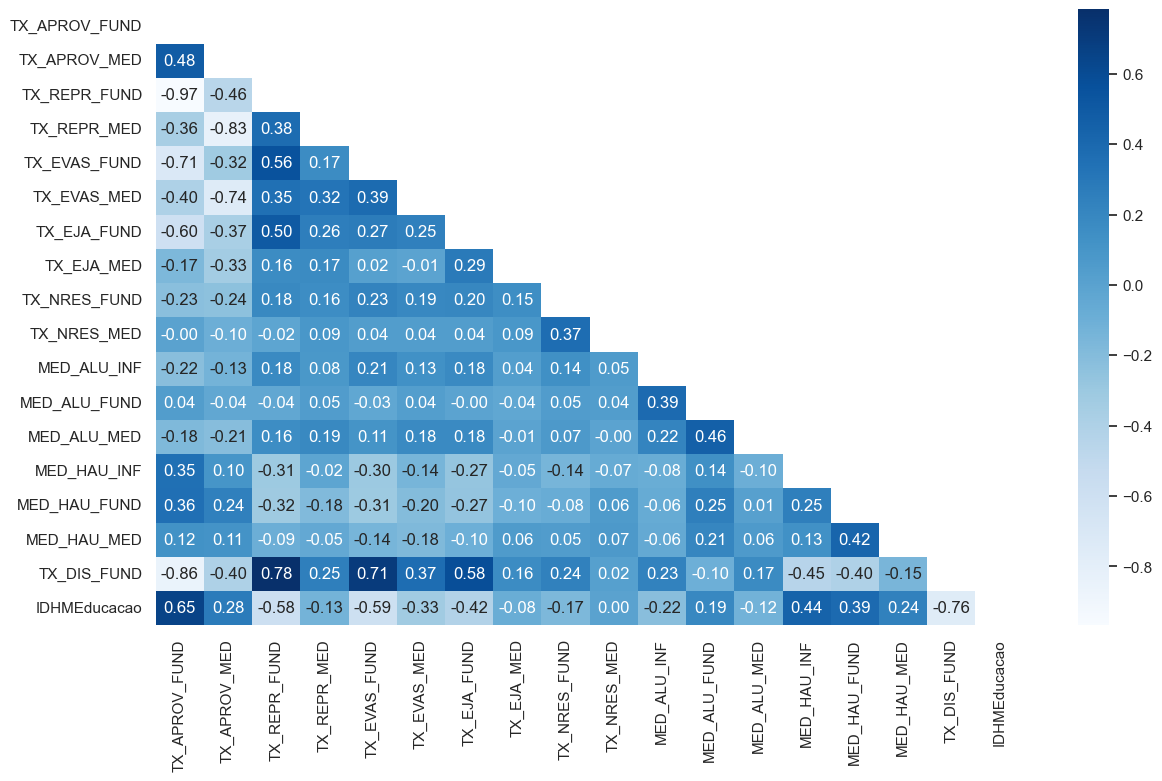

In [69]:
data_p_corr = data_numeric.corr()
mask = np.triu(data_p_corr)
plt.figure(figsize=(14, 8))
sns.heatmap(data_p_corr, annot=True, cmap='Blues', mask = mask, fmt = '.2f')
plt.grid(False)
plt.show()

* Alta relação do atributo alvo com as taxas do ensino fundamental.
* Alta correlação do atributo alvo com a taxa de distorção idade-série.
* Elevada correlação da taxa de distorção idade-série com as taxas do ensino fundamental.

### Coeficiente de Kendall

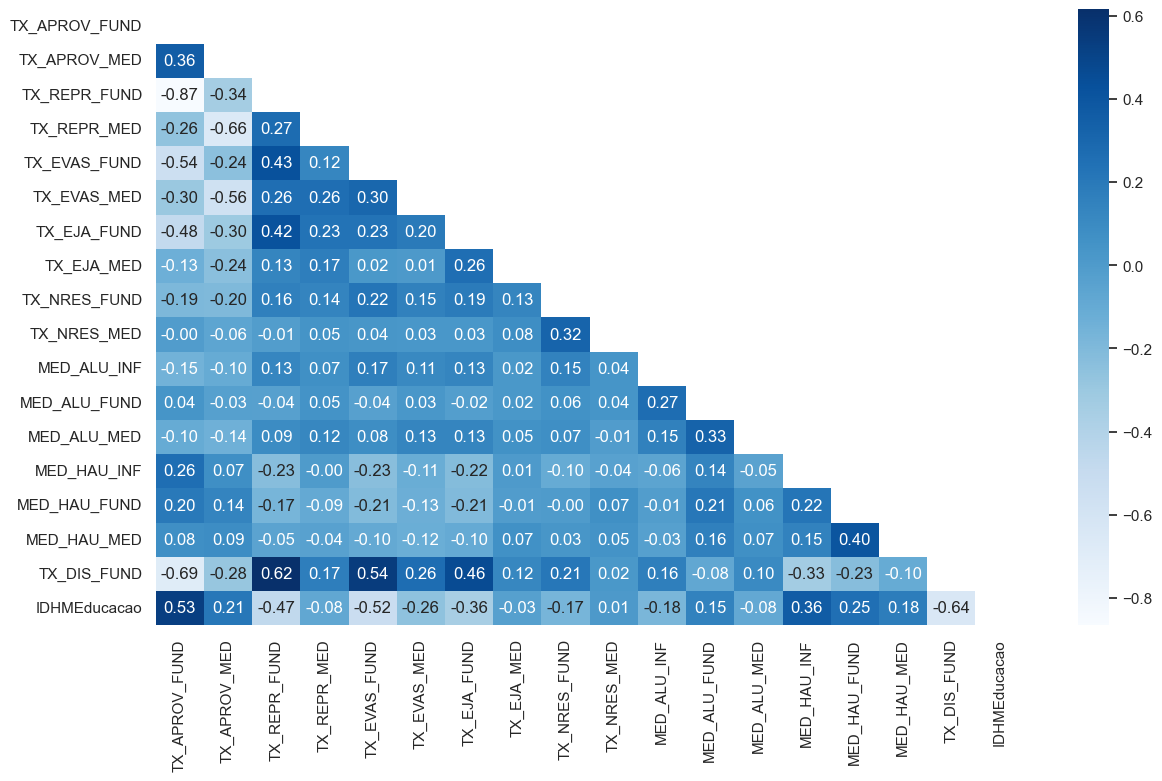

In [70]:
data_k_corr = data_numeric.corr(method = 'kendall')
mask = np.triu(data_k_corr)
plt.figure(figsize=(14, 8))
sns.heatmap(data_k_corr, annot=True, cmap='Blues', mask = mask, fmt = '.2f')
plt.grid(False)
plt.show()

* Resultado análogo à matriz com coeficiente de Pearson.

## Mapas de dispersão

### Taxas do ensino fundamental.

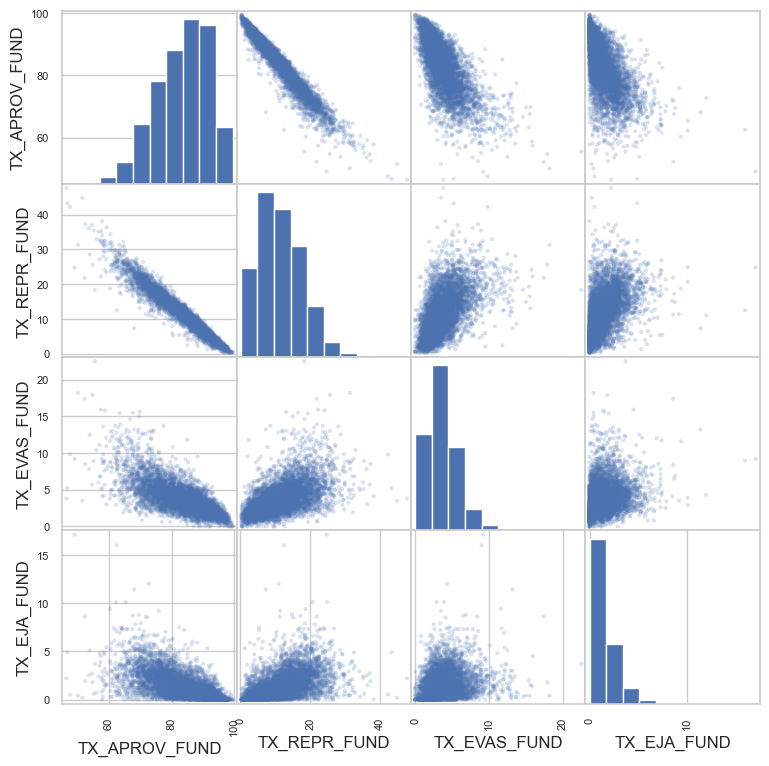

In [71]:
scatter_matrix(data[['TX_APROV_FUND', 'TX_REPR_FUND', 'TX_EVAS_FUND', 'TX_EJA_FUND']], alpha=0.2, figsize=(9, 9), diagonal='hist')
plt.show()

* Correlação alta entre a aprovação e reprovação e moderada no restante dos atributos.
* Concentração de aprovação em valores acima dos 50%.
* Concentração das demais variáveis abaixo dos 50%.

### Taxas do ensino médio

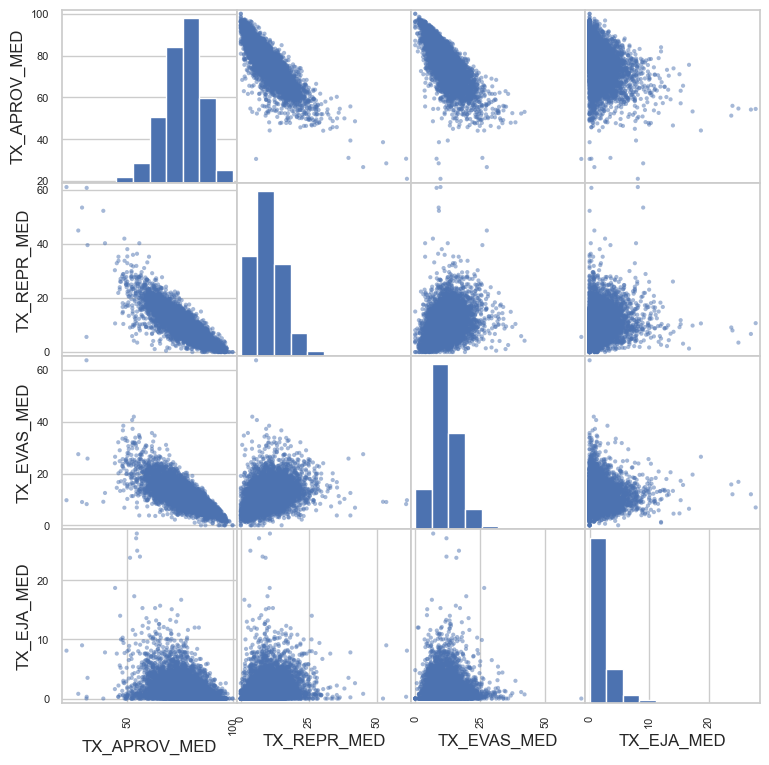

In [72]:
scatter_matrix(data[['TX_APROV_MED', 'TX_REPR_MED', 'TX_EVAS_MED', 'TX_EJA_MED']], alpha=0.5, figsize=(9,9), diagonal='hist', grid = True)
plt.show()

* Correlações mais baixas que as taxas do ensino fundamental.
* Concentrações similares às taxas do ensino fundamental.

In [73]:
def plotGraphs(columns_of_interest, target_column, data, size = (20, 5)):
    plt.figure(figsize=size)

    for i, col in enumerate(columns_of_interest):
        plt.subplot(1, len(columns_of_interest), i+1)

        x = data[target_column]
        y = data[col]

        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

        sns.scatterplot(x=x, y=y, hue=data['IDHMEducacao'], palette = 'viridis', alpha = 0.5, hue_order = ['Muito Baixo', 'Baixo', 'Médio', 'Alto'])
        plt.plot(x, intercept + slope * x, color='red')

        plt.ylabel(f'Atributo {col}')
        plt.title(f'{target_column} x Atributo {col}')
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
        plt.grid(False)
        plt.legend()

    plt.xlabel(f'Atributo {target_column}')
    plt.tight_layout()
    plt.show()

### Taxas do ensino fundamental X Taxa de distorção idade-série do ensino fundamental

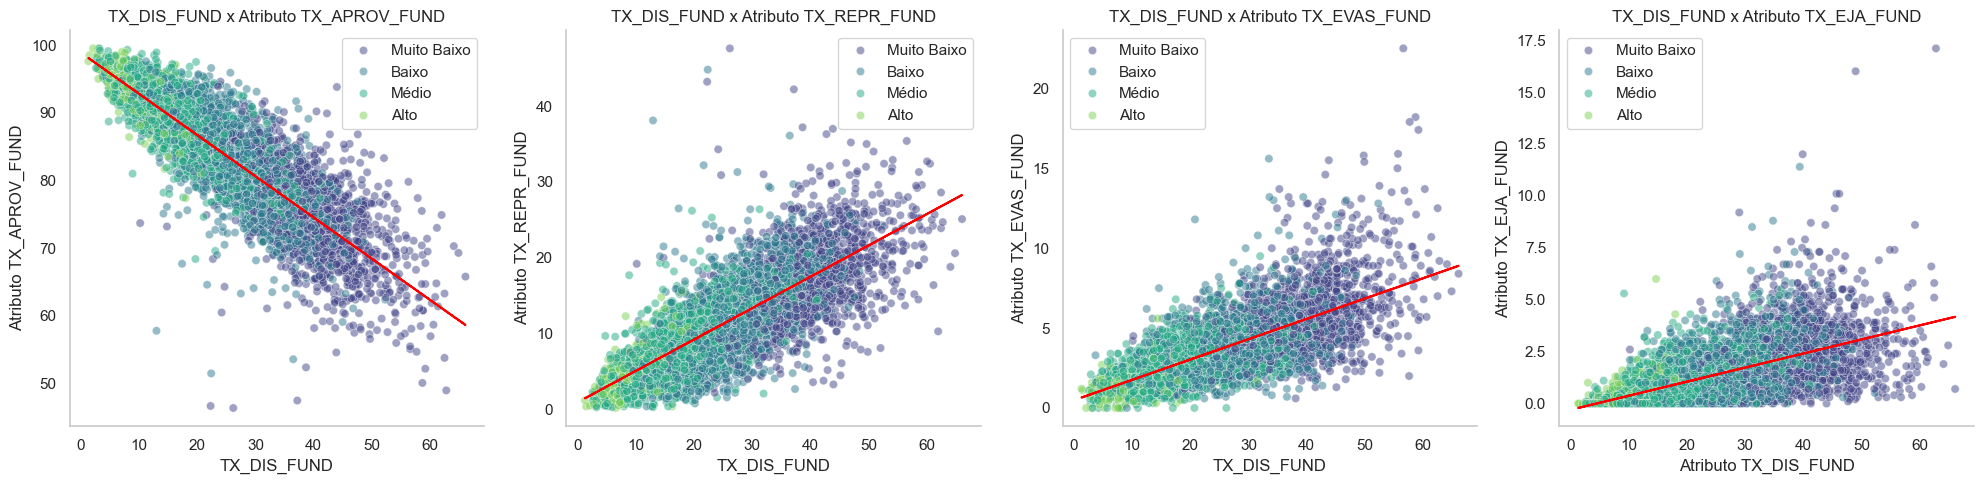

In [74]:
columns_of_interest = ['TX_APROV_FUND', 'TX_REPR_FUND', 'TX_EVAS_FUND', 'TX_EJA_FUND']
target = 'TX_DIS_FUND'
plotGraphs(columns_of_interest, target, data)

### Taxas do ensino médio X Taxa de distorção idade-série do ensino médio

* Alto grau de correlação entre atributos.

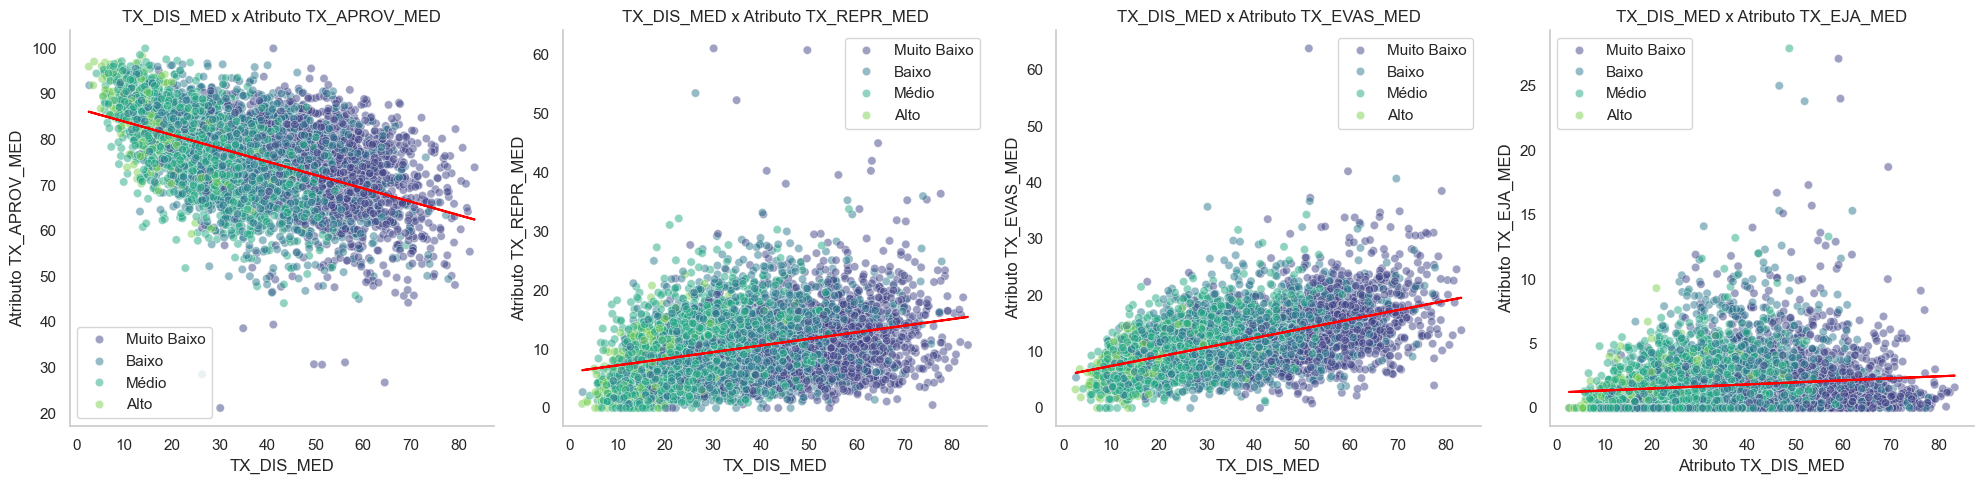

In [75]:
columns_of_interest = ['TX_APROV_MED', 'TX_REPR_MED', 'TX_EVAS_MED', 'TX_EJA_MED']
target = 'TX_DIS_MED'
plotGraphs(columns_of_interest, target, data)

* Grau de correlação menor em relação às taxas do ensino fundamental.

### Taxas do ensino infantil X Taxas de distorção idade-série

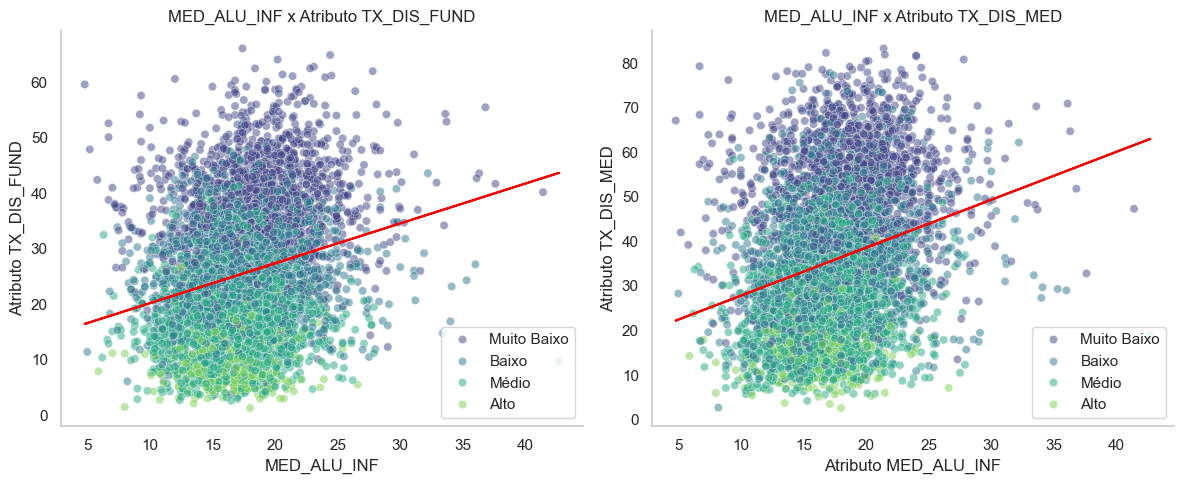

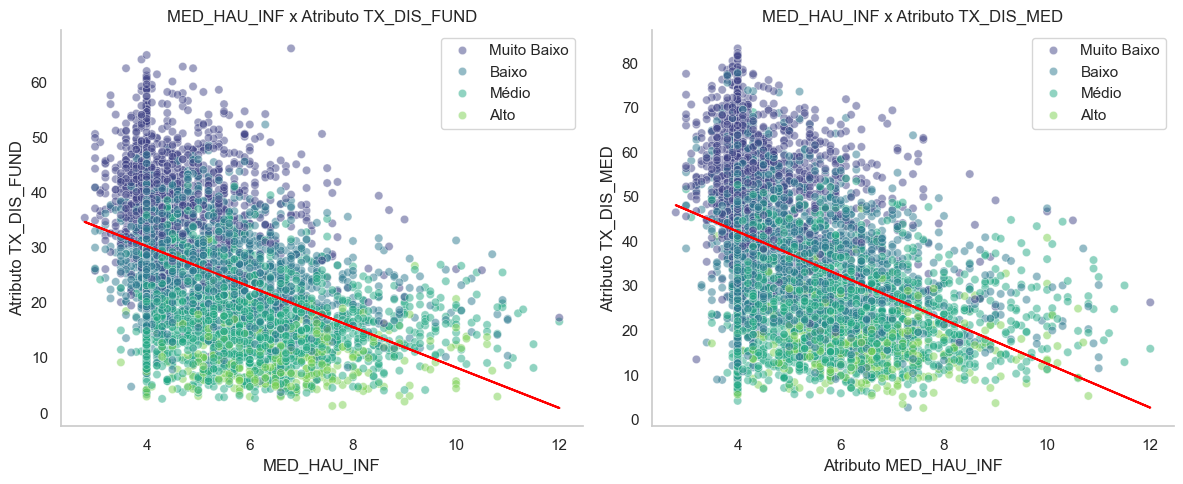

In [76]:
plotGraphs(['TX_DIS_FUND', 'TX_DIS_MED'], 'MED_ALU_INF', data, size = (12, 5))
plotGraphs(['TX_DIS_FUND', 'TX_DIS_MED'], 'MED_HAU_INF', data, size = (12, 5))

# Boxplots

In [103]:
def plot_attribute_across_idh_levels(data, attributes):
    sns.set(style="whitegrid")

    palette = sns.color_palette("viridis", 4)

    num_attributes = len(attributes)
    fig, axs = plt.subplots(1, num_attributes, figsize=(5 * num_attributes, 6))

    for i, attribute in enumerate(attributes):
        ax = axs[i] if num_attributes > 1 else axs
        sns.boxplot(x='IDHMEducacao', y=attribute, data=data, palette=palette, hue=data['IDHMEducacao'], ax=ax, order=['Muito Baixo', 'Baixo', 'Médio', 'Alto'])
        ax.set_xlabel('IDHMEducacao', fontsize=14)
        ax.set_ylabel(attribute, fontsize=14)
        ax.set_ylim(-1, data[attribute].max() * 1.015)
        # Remover as molduras superior e direita
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()

### Taxas do ensino fundamental X IDH

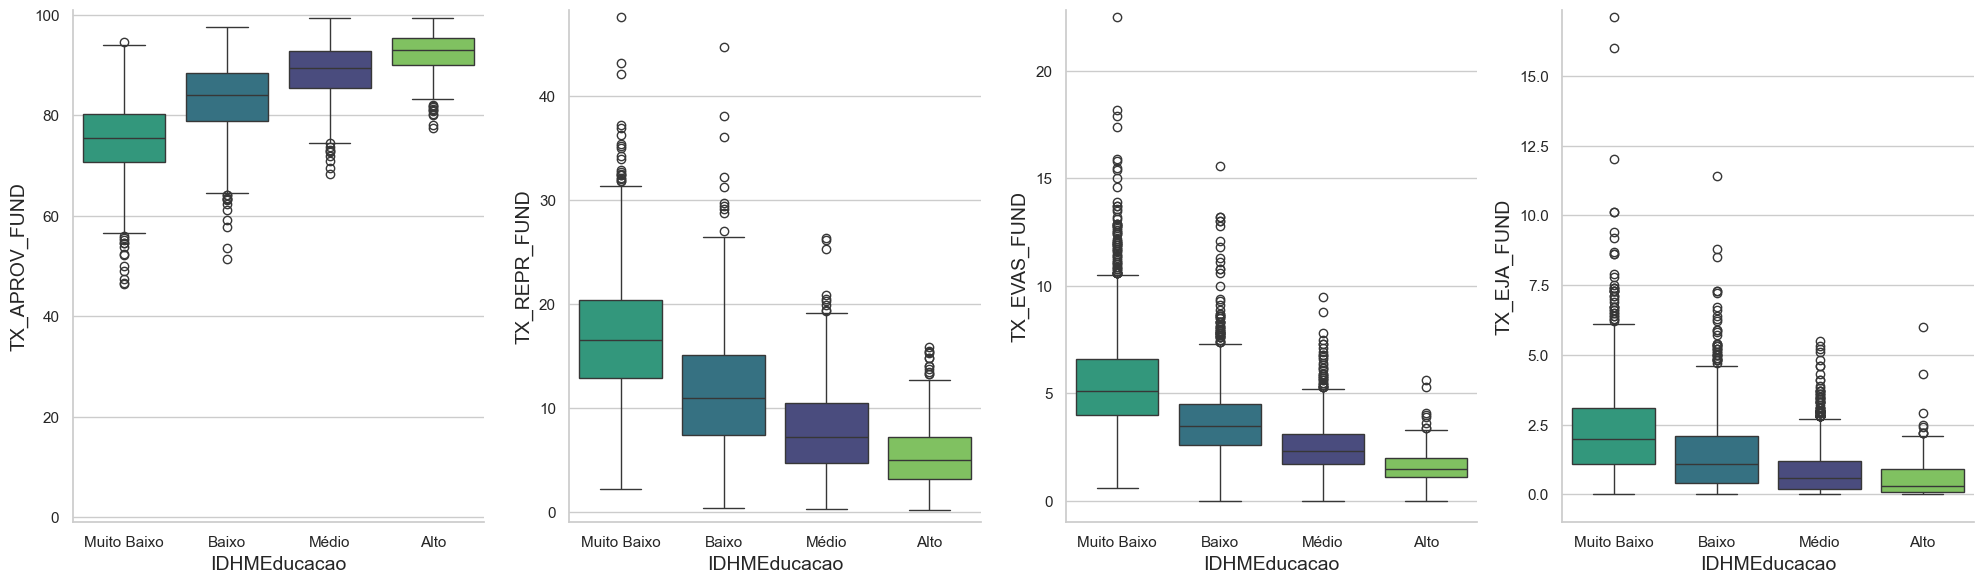

In [104]:
attributes = ['TX_APROV_FUND', 'TX_REPR_FUND', 'TX_EVAS_FUND', 'TX_EJA_FUND']

plot_attribute_across_idh_levels(data, attributes)

* Alto grau de proporcionalidade de acordo com o IDH.
* Relação positiva com aprovação.
* Relação negativa com reprovação, evasão e migração para o EJA.

### Taxas do ensino médio X IDH

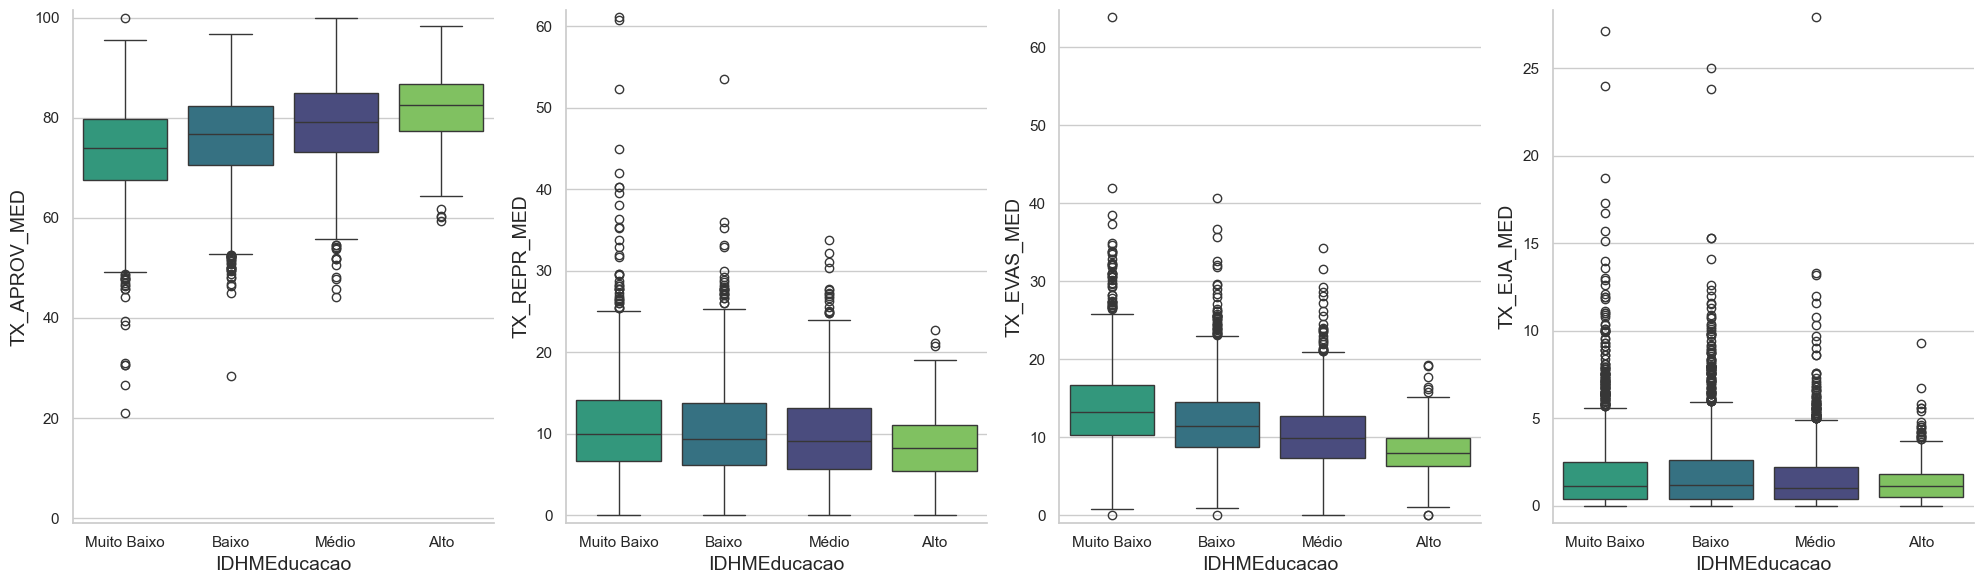

In [105]:
attributes = ['TX_APROV_MED', 'TX_REPR_MED', 'TX_EVAS_MED', 'TX_EJA_MED']

plot_attribute_across_idh_levels(data, attributes)

* Proporcionalidade menor em relação às taxas do ensino fundamental.
* Relações análogas ao ensino fundamental.

### Média de alunos X IDH

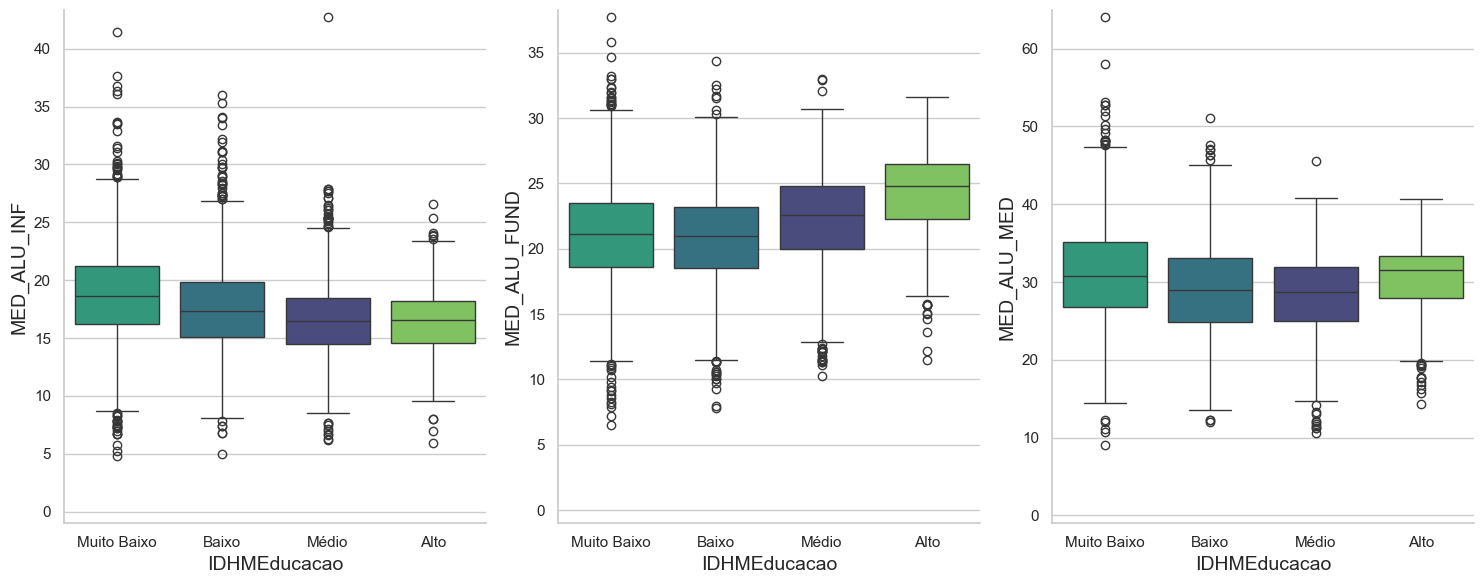

In [106]:
plot_attribute_across_idh_levels(data, ['MED_ALU_INF', 'MED_ALU_FUND', 'MED_ALU_MED'])

* Relação moderada negativa com média de alunos no ensino infantil.
* Relação baixa positiva com média de alunos no ensino fundamental.
* Relação baixa negativa com média de alunos no ensino médio.

### Média de horas-aula X IDH

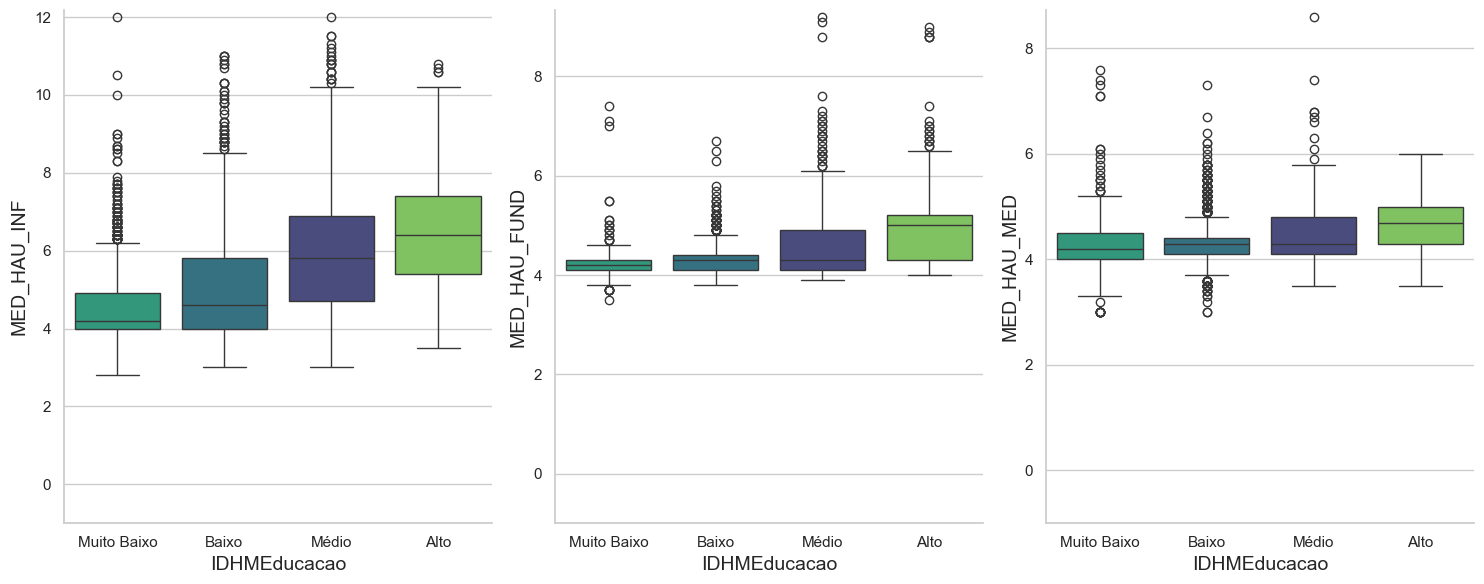

In [108]:
plot_attribute_across_idh_levels(data, ['MED_HAU_INF', 'MED_HAU_FUND', 'MED_HAU_MED'])

* Relação ligeiramente alta positiva de horas-aulas do ensino infantil.
* Relação ligeiramente alta positiva de horas do ensino fundamental.
* Relação moderada positiva de horas do ensino médio.

### Taxa de distorção idade-série X IDH

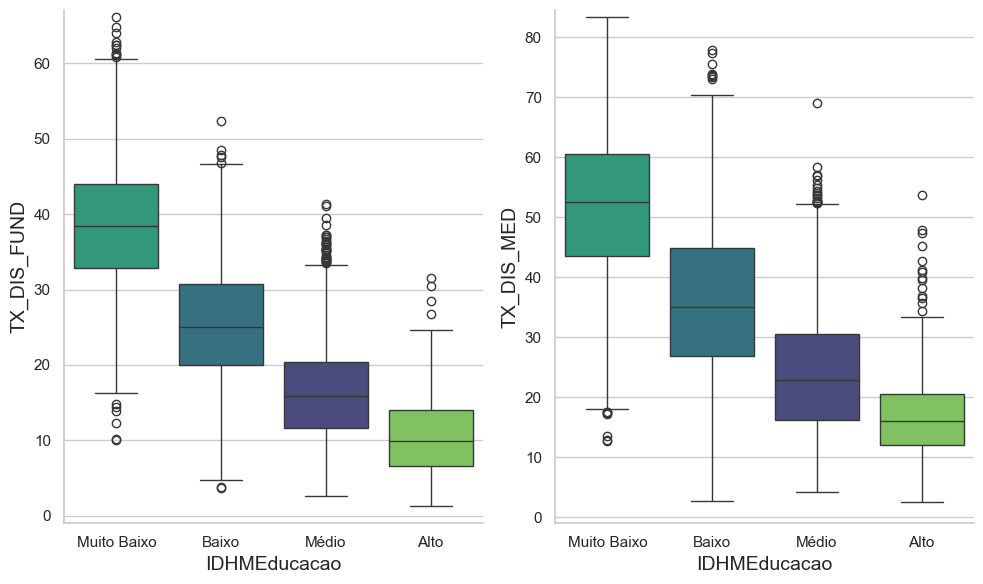

In [109]:
plot_attribute_across_idh_levels(data, ['TX_DIS_FUND', 'TX_DIS_MED'])

* Alta taxa de correlação.
* Correlação maior da taxa de distorção idade-série do ensino fundamental.